In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using .Src, Plots, Plots.Measures

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [2]:
function save_all_fig(r, rf, path, pt::String)
    savefig(r.plot_mles[1], joinpath(path, "$(pt)_mle_restart_a.pdf"))
    if length(r.plot_mles) > 1
        savefig(r.plot_mles[2], joinpath(path, "$(pt)_mle_restart_m.pdf"))
    end
    savefig(r.plot_losses, joinpath(path, "$(pt)_losses.pdf"))
    if length(r.gaussian_surface) > 1
        savefig(r.gaussian_surface[2], joinpath(path, "$(pt)_gaussian_surface_2.pdf"))
        savefig(r.gaussian_heatmap, joinpath(path, "$(pt)_gaussian_heatmap.pdf"))
        savefig(r.gaussian_surface[1], joinpath(path, "$(pt)_gaussian_surface_1.pdf"))
    else
        savefig(r.gaussian_surface, joinpath(path, "$(pt)_gaussian_surface_1.pdf"))
    end
    savefig(rf.trajectories, joinpath(path, "$(pt)_trajectories.pdf"))
    savefig(rf.sample_dens_n, joinpath(path, "$(pt)_dens_n.pdf"))
    savefig(rf.sample_dens_w, joinpath(path, "$(pt)_dens_w.pdf"))
end

save_all_fig (generic function with 1 method)

# Identifiability Analysis of Point in Parameter Region 3

p3 = [a,m,w0,n0] = [1.5,0.45,0.5,1.5]

In [3]:
# set true model parameters
a_true = 1.5 # at bifurcation unstable branch
m_true = 0.45
n0 = 1.5
w0 = 0.5
M = 100 # number of measurements
noise = 0.1

# create parameter object for trial
hprm = Hyperprm(w0, n0, a_true, m_true, M, noise);

## fixed time window, observe from t=0

In [4]:
# observation time window fixed
t_fixed = true

true

### infer a, m

In [5]:
# infer a,m parameter
prm_keys = [:a, :m];

In [6]:
# inverse uq and practical identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed, N=20)

# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], hprm, t_fixed=t_fixed)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

### analyze plots

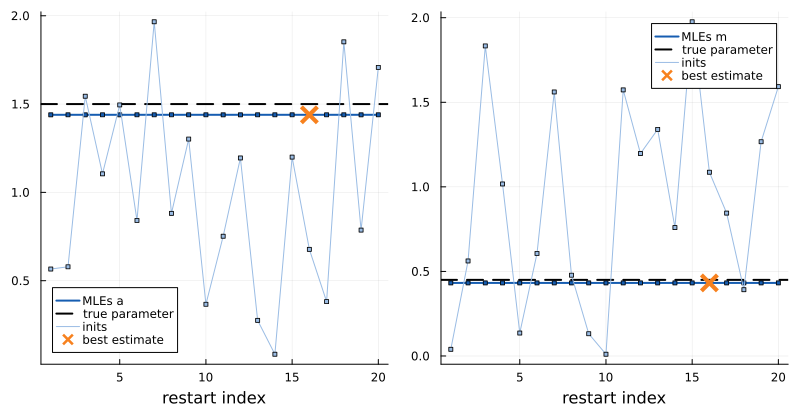

In [7]:
plot(r.plot_mles[1], r.plot_mles[2], layout=(1,2), size=(800,420), bottom_margin=5mm)

Unique optimum found, estimates a bit off from true value.

In [8]:
r.mle

2-element Vector{Float64}:
 1.4392143085296947
 0.43202975165853075

In [9]:
r.cov

2×2 Matrix{Float64}:
 0.0680785  0.0205249
 0.0205249  0.00620198

In [10]:
r.cor

2×2 Matrix{Float64}:
 1.0       0.998873
 0.998873  1.0

Again, very high correlation between the parameters.

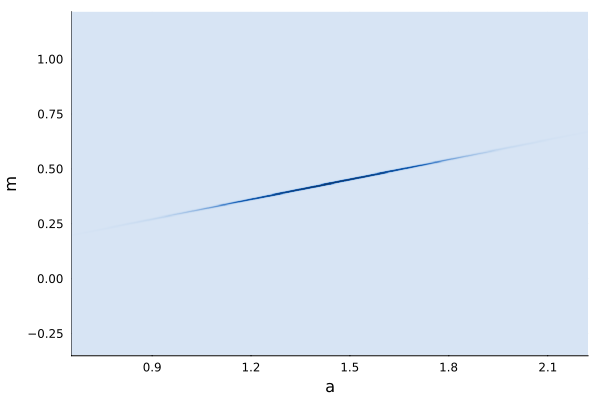

In [11]:
r.gaussian_heatmap

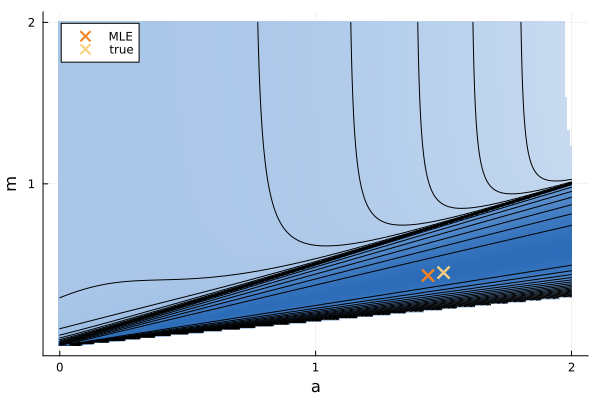

In [17]:
analyze_ll(r.mle,prm_keys, hprm,-6000, t_fixed=t_fixed, levels=20)
scatter!([a_true],[m_true], markershape=:x, markerstrokewidth=3, markersize=6, color="#FAD080", label="true")

In [18]:
savefig("C:/Users/lisah/Documents/Repos/ma-code/plots/uq/pt3/am/pt3_ll.pdf")

"C:\\Users\\lisah\\Documents\\Repos\\ma-code\\plots\\uq\\pt3\\am\\pt3_ll.pdf"

Likelihood function even more peaked than at point 2. Also, we see that MLE is quite off here.

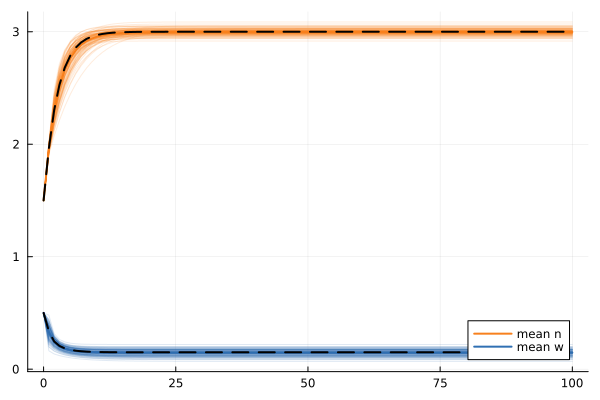

In [19]:
rf.trajectories

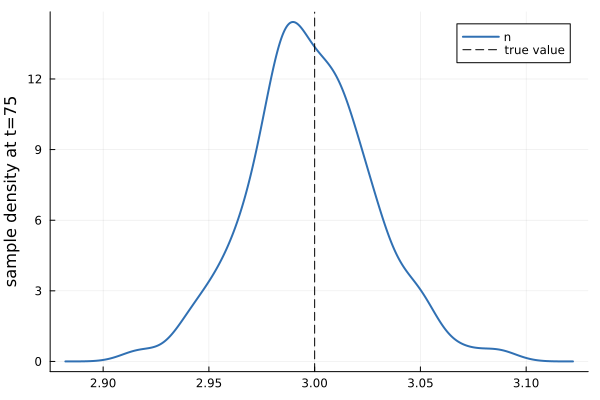

In [20]:
rf.sample_dens_n

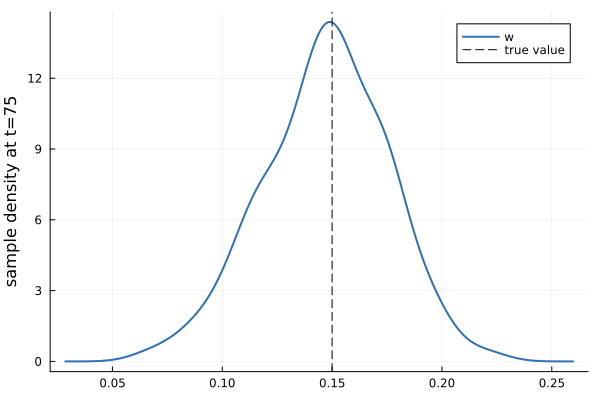

In [21]:
rf.sample_dens_w

In [22]:
path = "C:/Users/lisah/Documents/Repos/ma-code/plots/uq/pt3/am/"
save_all_fig(r,rf,path,"pt3")

"C:\\Users\\lisah\\Documents\\Repos\\ma-code\\plots\\uq\\pt3\\am\\pt3_dens_w.pdf"

sample densities concetrate around true value with some assymmetry.

Conclusion: the same as for point 2.

### infer a

In [ ]:
prm_keys= [:a];

In [ ]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed)

# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], hprm, t_fixed=t_fixed)

In [ ]:
r.cov

In [ ]:
r.plot_mles[1]

In [ ]:
r.plot_losses

apparantly, there are two distinctive maxima. However, due to the loss values it becomes clear which one is the correct one.

In [ ]:
analyze_ll(r.mle, prm_keys, hprm, -7900, t_fixed=t_fixed)
vline!([a_true], linestyle=:dash, linewidth=2, color=:"#FAD080", label="true")

In [ ]:
analyze_ll(r.mle, prm_keys, hprm, -100, t_fixed=t_fixed)
vline!([a_true], linestyle=:dash, linewidth=2, color=:"#FAD080", label="true")

The true value and thus the mle lie in a clearly peaked global maximum.

In [33]:
savefig("C:/Users/lisah/Documents/Repos/ma-code/plots/uq/pt3/a/pt3_ll_cutoff.pdf")

"C:\\Users\\lisah\\Documents\\Repos\\ma-code\\plots\\uq\\pt3\\a\\pt3_ll_cutoff.pdf"

The second maximum appears because a=0.15 leads to the same equilibrium value of w.
Due to the high correlation of a,m when inferring both parameters, this maximum does not appear in the other case. Maximizing the likelihood also in direction of m already "shifts" a into the correct direction. 

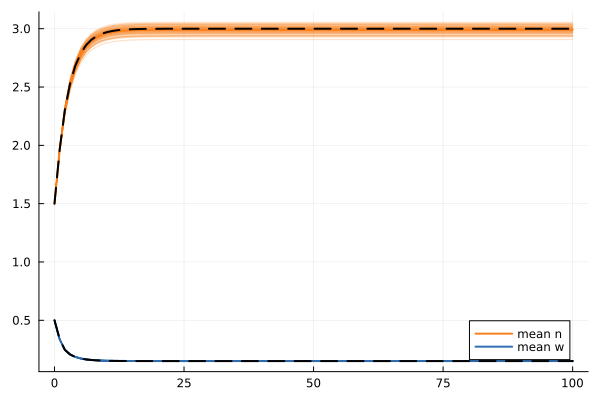

In [34]:
rf.trajectories

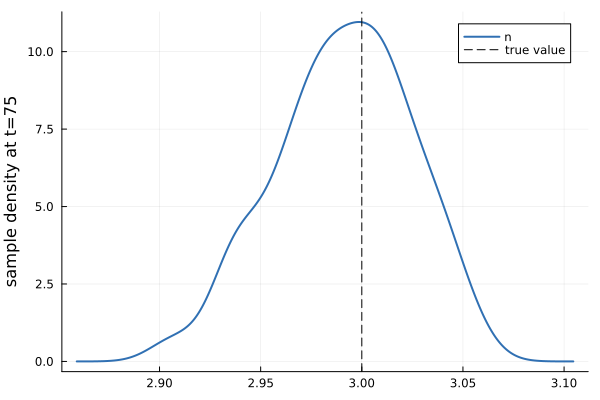

In [35]:
rf.sample_dens_n

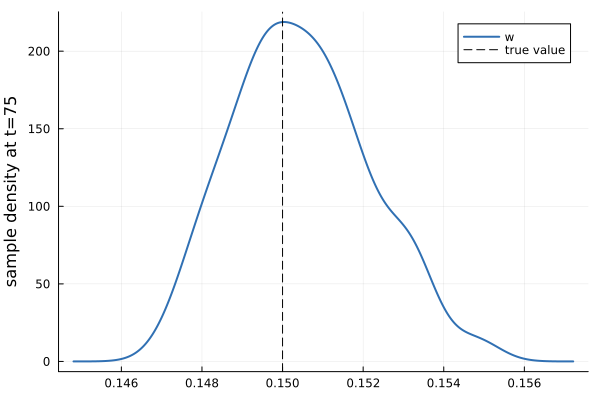

In [36]:
rf.sample_dens_w

In [31]:
path = "C:/Users/lisah/Documents/Repos/ma-code/plots/uq/pt3/a/"
save_all_fig(r,rf,path,"pt3")

"C:\\Users\\lisah\\Documents\\Repos\\ma-code\\plots\\uq\\pt3\\a\\pt3_dens_w.pdf"

## fixed time window, observe stable state only

In [5]:
# observation time window fixed
t_fixed = true

# observations in stable state only
obs_late = true
t_obs=100.0
t_end = 200.0;

### infer a

In [6]:
# infer a,m parameter
prm_keys = [:a];

In [7]:
# inverse uq and practica identifiability
r = assess_practical_identifiability(prm_keys, hprm, t_fixed=t_fixed, obs_late=obs_late, t_end=t_end, t_obs=t_obs)

# forward uq
rf = forward_uq(r.mle, r.cov, prm_keys, [a_true, m_true], hprm, t_fixed=t_fixed, t_end=t_end)

(trajectories = Plot{Plots.GRBackend() n=204}, sample_dens_n = Plot{Plots.GRBackend() n=2}, sample_dens_w = Plot{Plots.GRBackend() n=2})

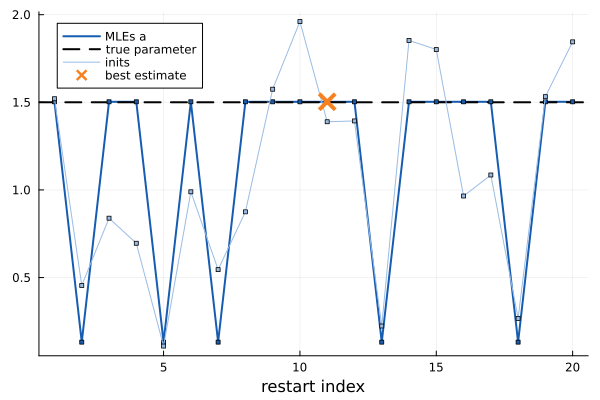

In [9]:
r.plot_mles[1]

In [10]:
r.cov

1×1 Matrix{Float64}:
 0.0003194161129741173

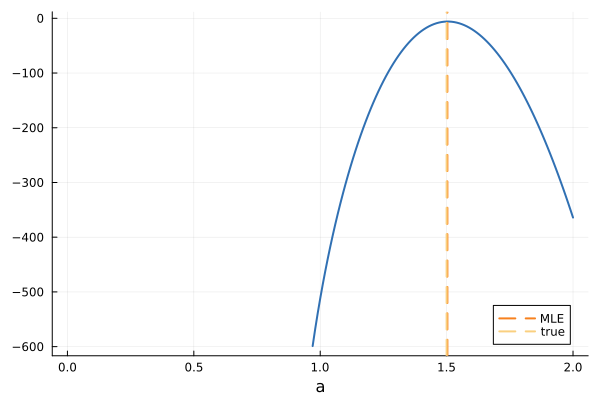

In [11]:
analyze_ll(r.mle, prm_keys, hprm, -600, t_fixed=t_fixed, obs_late=obs_late,t_end=t_end)
vline!([a_true], linestyle=:dash, linewidth=2, color=:"#FAD080", label="true")

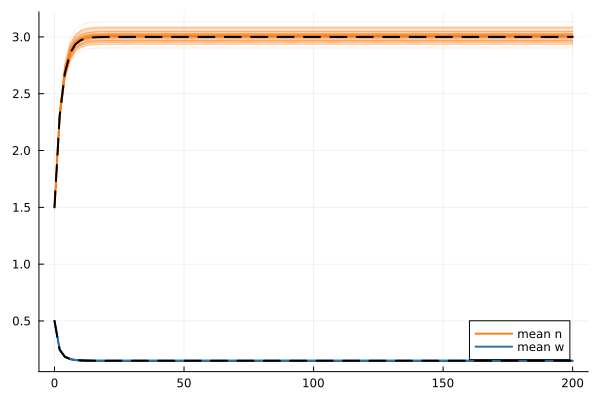

In [12]:
rf.trajectories